# Checkpoints - Part 1
## Checkpoint 1: Data Cleaning 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.float_format', lambda x: '%.2f' %x)
import warnings
warnings.filterwarnings('ignore')

In [2]:
companies=pd.read_csv('companies.csv',engine='python')
rounds2=pd.read_csv('rounds2.csv',engine='python')

In [3]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00
114946,/organization/ã�eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.00
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.00


In [4]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Ã�Eron,Ã�ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


Observation- Special charecters are there, need to remove these.

#### How many unique companies are present in rounds2

In [5]:
rounds2['company_permalink']=rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()

In [6]:
rounds2.company_permalink.nunique()

66368

#### How many unique companies are present in companies?

In [7]:
#removing special charecters and converting permalink column into lower case-
companies['permalink']=companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()

In [8]:
len(companies.permalink.unique())

66368

#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [9]:
companies.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/hc-rods-and-customs,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


                permalink can be used as unique key because total count and unique count is same.

#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [10]:
rounds2.company_permalink[~rounds2.company_permalink.str.lower().isin(companies.permalink.str.lower())]

Series([], Name: company_permalink, dtype: object)

                                                No such company is present.

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [11]:
master_frame=pd.merge(left=rounds2,right=companies,left_on='company_permalink',right_on='permalink')

In [12]:
master_frame.shape

(114949, 16)

In [13]:
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [14]:
#Remove column "permalink" as it duplicate column after merging
master_frame=master_frame.drop(['permalink'],1)

In [15]:
# data Type Check
master_frame.info()
#Data type are ok

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


#### Missing Value Check

In [16]:
100*master_frame.isnull().sum()/len(master_frame)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

As per above output, funding_round_code is having approx 73% of missing values and will not be useful in any analysis

In [17]:
#Remove column 'funding_round_code'
master_frame=master_frame.drop(['funding_round_code'],1)

#### Raised_amount_usd is target attribute and has approximately 17 % of missing values. so can be removed.

In [18]:
# Remove null value records from raised_amount_usd column
master_frame=master_frame[~np.isnan(master_frame.raised_amount_usd)]

#### Choose 4 type of funding types and create new data frame

In [19]:
mf1=master_frame[(master_frame.funding_round_type=='venture') |
                 (master_frame.funding_round_type=='seed')|
                 (master_frame.funding_round_type=='angel')
                 |(master_frame.funding_round_type=='private_equity')]

In [20]:
mf1.shape

(80627, 14)

In [21]:
mf1.funding_round_type.value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

#### Outlier Treatment with help of IQR method

In [22]:
#Average value of raised_amount before outliers removal
mf1.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel              958694.47
private_equity   73308593.03
seed               719818.00
venture          11748949.13
Name: raised_amount_usd, dtype: float64

In [23]:
mf1.groupby('funding_round_type')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.00,958694.47,7404397.12,0.00,150000.00,400000.00,1000000.00,494511992.00
private_equity,1936.00,73308593.03,198113458.41,0.00,5000000.00,20000000.00,75000000.00,4745460219.00
seed,23603.00,719818.00,2221732.80,0.00,55000.00,275000.00,1000000.00,200000000.00
venture,50228.00,11748949.13,86352066.56,0.00,1600901.75,5000000.00,12000000.00,17600000000.00


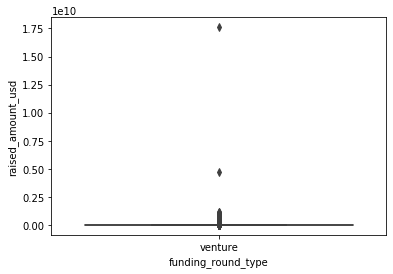

In [24]:
sns.boxplot(x=mf1.funding_round_type[mf1.funding_round_type=='venture'],y=mf1.raised_amount_usd)

###### Remove outliers from raised_amount_usd as per funding_round_type
#### Dont have domain knowledge so IQR method will be preferred for outlier detection

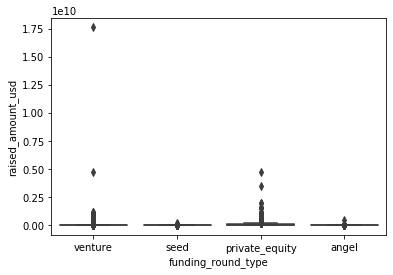

In [25]:
sns.boxplot(x=mf1.funding_round_type,y=mf1.raised_amount_usd)
plt.show()

#### many values for raised_amount_usd are 0 o

In [26]:
v=(mf1.raised_amount_usd[mf1.funding_round_type=='venture']).quantile([.05,.25,.50,.75,.95])
s=(mf1.raised_amount_usd[mf1.funding_round_type=='seed']).quantile([.05,.25,.50,.75,.95])
a=(mf1.raised_amount_usd[mf1.funding_round_type=='angel']).quantile([.05,.25,.50,.75,.95])
p=(mf1.raised_amount_usd[mf1.funding_round_type=='private_equity']).quantile([.05,.25,.50,.75,.95])

vq1=v[.25]
vq3=v[.75]
v_iqr=(vq3-vq1)
vl=vq1-1.5*v_iqr
vh=vq3+1.5*v_iqr

sq1=s[.25]
sq3=s[.75]
s_iqr=(sq3-sq1)
sl=sq1-1.5*s_iqr
sh=sq3+1.5*s_iqr

aq1=a[.25]
aq3=a[.75]
a_iqr=(aq3-aq1)
al=aq1-1.5*a_iqr
ah=aq3+1.5*a_iqr

pq1=p[.25]
pq3=p[.75]
p_iqr=(pq3-pq1)
pl=pq1-1.5*p_iqr
ph=pq3+1.5*p_iqr

In [27]:
print(vl,vh,sl,sh,al,ah,pl,ph)

-13997745.625 27598647.375 -1362500.0 2417500.0 -1125000.0 2275000.0 -100000000.0 180000000.0


In [28]:
mf1.shape

(80627, 14)

In [29]:
mf2=mf1[~((mf1.funding_round_type=='venture')&((mf1.raised_amount_usd<vl)|(mf1.raised_amount_usd>vh)))]
mf2=mf2[~((mf2.funding_round_type=='angel')&((mf2.raised_amount_usd<al)|(mf2.raised_amount_usd>ah)))]
mf2=mf2[~((mf2.funding_round_type=='seed')&((mf2.raised_amount_usd<sl)|(mf2.raised_amount_usd>sh)))]
mf2=mf2[~((mf2.funding_round_type=='private_equity')&((mf2.raised_amount_usd<pl)|(mf2.raised_amount_usd>ph)))]
mf2.shape

(74486, 14)

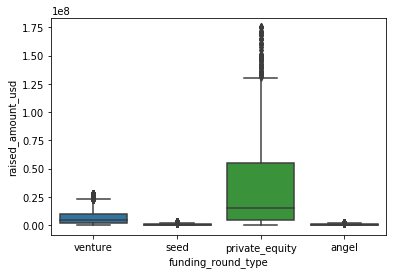

In [30]:
sns.boxplot(x=mf2.funding_round_type,y=mf2.raised_amount_usd)
plt.show()

### Raised amount is positively skewed so outliers will still remain if try to remove outliers again. so continuing with present data as main outliers have been removed from dataset

In [31]:
# Remove all 0s in raised_amount_usd column
mf2=mf2[~(mf2.raised_amount_usd==0)]

In [32]:
mf2.shape

(74328, 14)

# Lets find the Average raised amount for all four funding round type.

In [33]:
mf2.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel              536996.35
private_equity   35017673.58
seed               502689.24
venture           6434683.54
Name: raised_amount_usd, dtype: float64

In [34]:
mf2[mf2.funding_round_type=='venture'].head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


### Checkpoint 3: Country Analysis

In [35]:
mf2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at'],
      dtype='object')

In [36]:
cnt=(mf2[['country_code','raised_amount_usd']][mf2.funding_round_type=='venture']).groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)



In [37]:
#Top9 countries as per investment 
cnt.head(10)

country_code
USA   215849867665.00
GBR    11423380433.00
CHN    10492349562.00
CAN     6756630267.00
IND     5654658721.00
ISR     5393014579.00
FRA     4818086006.00
DEU     3539402777.00
CHE     1580647119.00
SWE     1545004156.00
Name: raised_amount_usd, dtype: float64

####  Top 3 English Speaking countries are USA, GBR and Canada

In [38]:
# creating list of top9 countries.
c9=cnt.head(9).index.tolist()

In [39]:
c9

['USA', 'GBR', 'CHN', 'CAN', 'IND', 'ISR', 'FRA', 'DEU', 'CHE']

In [40]:
#Creation of top9 Data Frame with given conditions(suitable fund type plus top9 countries)
top9=mf2[(mf2.country_code.isin(c9))&(mf2.funding_round_type=='venture')]

In [41]:
top9.country_code.unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'DEU', 'CHE', 'ISR'],
      dtype=object)

### Checkpoint 4: Sector Analysis 1

In [42]:
#Importing mapping csv
mapping=pd.read_csv('mapping.csv',engine='python')

In [43]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [44]:
mapping.category_list[1:][mapping.category_list[~(mapping.category_list.isnull())].str.contains('0')].head()

20    Alter0tive Medicine
22               A0lytics
59      Big Data A0lytics
79      Business A0lytics
89                Can0bis
Name: category_list, dtype: object

In [45]:
zeros=mapping.category_list[1:][mapping.category_list[~(mapping.category_list.isnull())].str.contains('0')]

In [46]:
len(zeros)

53

#### There are 53 records in category list column where 0 is present so need to replace 0 with na

In [47]:
mapping=mapping[~(mapping.category_list.isnull())]

In [48]:
#Replace all 0 with na
mapping['category_list']=mapping.category_list.str.replace('0','na')


In [49]:
mapping.category_list[mapping.category_list.str.contains("2.na")]

243    Enterprise 2.na
Name: category_list, dtype: object

In [50]:
mapping.loc[243,'category_list']='Enterprise 2.0'

In [51]:
#Check if any 0 still remain in mapping.category_list column
mapping.category_list[1:][mapping.category_list[~(mapping.category_list.isnull())].str.contains('0')].head()

243    Enterprise 2.0
Name: category_list, dtype: object

#### Extract the primary sector of each category list from the category_list column

In [52]:
top9.loc[::,'primary_sector']=top9.category_list.str.split('|').str[0]

In [53]:
top9.primary_sector.head()

0             Media
4       Curated Web
8     Biotechnology
10        Analytics
11        Analytics
Name: primary_sector, dtype: object

In [54]:
top9.shape

(40460, 15)

#### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [55]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [56]:
mapping.category_list[1:][mapping.category_list[~(mapping.category_list.isnull())].str.contains('0')].head()

243    Enterprise 2.0
Name: category_list, dtype: object

In [57]:
x=mapping.iloc[:,1:]

In [58]:
x=x.idxmax(axis=1)

In [59]:
type(x)

pandas.core.series.Series

In [60]:
x1=pd.Series(x,name='main_sector')

In [61]:
mapping1=pd.concat([mapping.category_list,x1],axis=1)

In [62]:
mapping1.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health


In [63]:
#removing null value
mapping1=mapping1[~mapping1.category_list.isnull()]

In [64]:
mapping1.groupby('main_sector')['category_list'].count()

main_sector
Automotive & Sports                         22
Cleantech / Semiconductors                  53
Entertainment                               89
Health                                      63
Manufacturing                               40
News, Search and Messaging                  72
Others                                     195
Social, Finance, Analytics, Advertising    153
Name: category_list, dtype: int64

In [65]:
mapping1.shape

(687, 2)

In [66]:
top9.shape

(40460, 15)

In [67]:
top9.primary_sector.isnull().sum()

229

In [68]:
#Removing null values from primary secotr column
top9=top9[~top9.primary_sector.isnull()]

In [69]:
#converting both merging columns in lower case
top9.primary_sector=top9.primary_sector.str.lower()
mapping1.category_list=mapping1.category_list.str.lower()

In [70]:
#Merge top9 and mapping1 data frames
df = pd.merge(top9, mapping1, how = "left", left_on = "primary_sector" , right_on = "category_list")

In [71]:
df.shape

(40231, 17)

In [72]:
df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [73]:
df.main_sector.isnull().sum()

9

In [74]:
#remove null records in main_sector column
df=df[~df.main_sector.isnull()]

In [75]:
df.shape

(40222, 17)

### Checkpoint 5: Sector Analysis 2

In [76]:
#Creating data frames for three different top english speaking countries
D1=df[(df.country_code=='USA')&((df.raised_amount_usd>=5000000)&(df.raised_amount_usd<=15000000))]
D2=df[(df.country_code=='GBR')&((df.raised_amount_usd>=5000000)&(df.raised_amount_usd<=15000000))]
D3=df[(df.country_code=='CAN')&((df.raised_amount_usd>=5000000)&(df.raised_amount_usd<=15000000))]

In [77]:
print(len(D1)+len(D2)+len(D3))

13106


In [78]:
len(D1)

12063

In [79]:
D1_summary=D1.groupby(['main_sector'])['raised_amount_usd'].agg(['sum','count'])
D1_summary.reset_index(inplace=True)
D1_summary.rename(columns={'sum':'invest_amount','count':'invest_count'})

,main_sector,invest_amount,invest_count
0,Automotive & Sports,1454104361.00,167
1,Cleantech / Semiconductors,21633430822.00,2350
2,Entertainment,5099197982.00,591
3,Health,8211859357.00,909
4,Manufacturing,7258553378.00,799
5,"News, Search and Messaging",13971567428.00,1583
6,Others,26321007002.00,2950
7,"Social, Finance, Analytics, Advertising",23807376964.00,2714


In [80]:
D2_summary=D2.groupby(['main_sector'])['raised_amount_usd'].agg(['sum','count'])
D2_summary.reset_index(inplace=True)
D2_summary.rename(columns={'sum':'invest_amount','count':'invest_count'})

,main_sector,invest_amount,invest_count
0,Automotive & Sports,167051565.00,16
1,Cleantech / Semiconductors,1163990056.00,130
2,Entertainment,482784687.00,56
3,Health,214537510.00,24
4,Manufacturing,361940335.00,42
5,"News, Search and Messaging",615746235.00,73
6,Others,1283624289.00,147
7,"Social, Finance, Analytics, Advertising",1089404014.00,133


In [81]:
D3_summary=D3.groupby(['main_sector'])['raised_amount_usd'].agg(['sum','count'])
D3_summary.reset_index(inplace=True)
D3_summary.rename(columns={'sum':'invest_amount','count':'invest_count'})

,main_sector,invest_amount,invest_count
0,Automotive & Sports,15000000.00,2
1,Cleantech / Semiconductors,1015887607.00,112
2,Entertainment,160022068.00,23
3,Health,168345064.00,21
4,Manufacturing,237633071.00,31
5,"News, Search and Messaging",420121113.00,46
6,Others,926137962.00,109
7,"Social, Finance, Analytics, Advertising",656143075.00,78


In [82]:
#Merge all three data frames with there summary data frames

In [83]:
D1=pd.merge(left=D1, right=D1_summary, on='main_sector')
D2=pd.merge(left=D2, right=D2_summary, on='main_sector')
D3=pd.merge(left=D3, right=D3_summary, on='main_sector')

In [84]:
# Total number of Investments (count)
print(D1.raised_amount_usd.count(),D2.raised_amount_usd.count(),D3.raised_amount_usd.count())

12063 621 422


In [85]:
#Total amount of investment (USD)
print(D1.raised_amount_usd.sum(),D2.raised_amount_usd.sum(),D3.raised_amount_usd.sum())

107757097294.0 5379078691.0 3599289960.0


In [86]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [87]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [88]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     78
News, Search and Messaging                  46
Manufacturing                               31
Entertainment                               23
Health                                      21
Automotive & Sports                          2
Name: raised_amount_usd, dtype: int64

In [89]:
print(D1.shape,D2.shape,D3.shape)

(12063, 19) (621, 19) (422, 19)


#### For point 3 (top sector count-wise), which company received the highest investment?

In [90]:
D1[D1.main_sector=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Virtustream           64300000.00
Capella Photonics     54968051.00
AirTight Networks     54201907.00
deCarta               52100000.00
Black Duck Software   51000000.00
                          ...    
Campus Explorer        5000000.00
Campus Quad            5000000.00
Oculan                 5000000.00
NuView Systems         5000000.00
Dolls Kill             5000000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

In [91]:
D1[D1.main_sector=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
SST Inc. (Formerly ShotSpotter)   67933006.00
Demandbase                        63000000.00
Intacct                           61800000.00
NetBase Solutions                 60600000.00
Lotame                            59700000.00
                                      ...    
Jellyvision                        5000000.00
Yerdle                             5000000.00
EquityMetrix                       5000000.00
Apester                            5000000.00
WibiData                           5000000.00
Name: raised_amount_usd, Length: 1847, dtype: float64

In [92]:
D2[D2.main_sector=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Electric Cloud            37000000.00
SenSage                   36250000.00
Enigmatec                 32500000.00
SilverRail Technologies   29000000.00
OpenCloud                 27972766.00
                              ...    
Bacula Systems             5000000.00
Vector Watch               5000000.00
PhotoBox                   5000000.00
The Filter                 5000000.00
BullGuard                  5000000.00
Name: raised_amount_usd, Length: 120, dtype: float64

In [93]:
D2[D2.main_sector=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Celltick Technologies   37500000.00
myThings                34000000.00
Zopa                    32900000.00
VisualDNA               28550000.00
MarketInvoice           25553007.00
                            ...    
Rangespan                5000000.00
DueDil                   5000000.00
Tamoco                   5000000.00
MOO.COM                  5000000.00
The Fizzback Group       5000000.00
Name: raised_amount_usd, Length: 104, dtype: float64

In [94]:
D3[D3.main_sector=='Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Fresco Microchip           48000000.00
Ostara                     43152682.00
Diablo Technologies        35500000.00
Zymeworks                  34100000.00
enGene                     31150000.00
                               ...    
CRAiLAR                     5090068.00
CelluFuel                   5000000.00
MedGenesis Therapeutix      5000000.00
Smart Energy Instruments    5000000.00
UTILICASE                   5000000.00
Name: raised_amount_usd, Length: 80, dtype: float64

In [95]:
D3[D3.main_sector=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
QuickPlay Media        38700000.00
NewStep Networks       31477853.00
Strangeloop Networks   21500000.00
Morega Systems         20000000.00
LxDATA                 19310000.00
                           ...    
Bistro Corp             5000000.00
Hatsize                 5000000.00
Tungle.me               5000000.00
Aimetis                 5000000.00
TeamBuy                 5000000.00
Name: raised_amount_usd, Length: 88, dtype: float64

### Checkpoint 6: Plots

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [96]:
fund_sum=mf2.groupby('funding_round_type')['raised_amount_usd'].agg(['sum','mean']).reset_index()
fund_sum=fund_sum.rename(columns={'sum':'sum_invest','mean':'average_invest'})

fund_sum['fraction']=100*(fund_sum.sum_invest)/(fund_sum.sum_invest.sum())

In [97]:
fund_sum['avg_usd_mil']=fund_sum.average_invest/1000000

In [98]:
fund_sum

,funding_round_type,sum_invest,average_invest,fraction,avg_usd_mil
0,angel,2422390555.00,536996.35,0.65,0.54
1,private_equity,61420999461.00,35017673.58,16.59,35.02
2,seed,11153668946.00,502689.24,3.01,0.50
3,venture,295191107412.00,6434683.54,79.74,6.43


In [99]:
from IPython.core.pylabtools import figsize

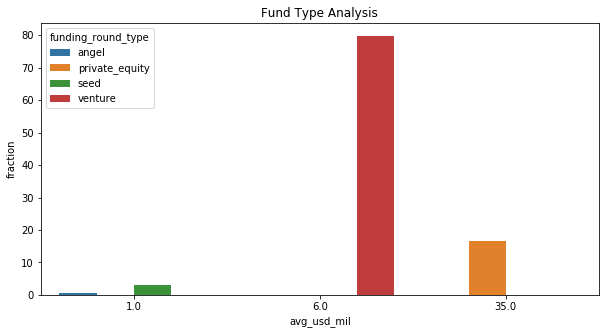

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x=round(fund_sum.avg_usd_mil),y=fund_sum.fraction, hue=fund_sum.funding_round_type,data=fund_sum)
plt.title('Fund Type Analysis')
plt.show()

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [101]:
t1=cnt.head(9)

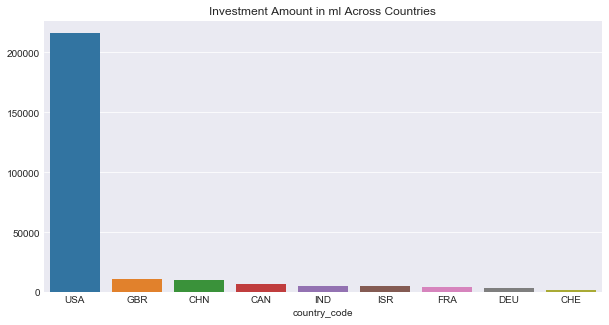

In [102]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=t1.index,y=t1.values/1000000)
plt.title('Investment Amount in ml Across Countries')
plt.show()

#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [103]:
#Select three main sectors from D1,D2,D3 and combine them
D1topsect=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2topsect=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D3topsect=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [104]:
print(len(D1topsect),len(D2topsect),len(D3topsect))

8014 410 299


In [105]:
D123=pd.concat([D1topsect,D2topsect,D3topsect],axis=0)

In [106]:
D123.shape

(8723, 19)

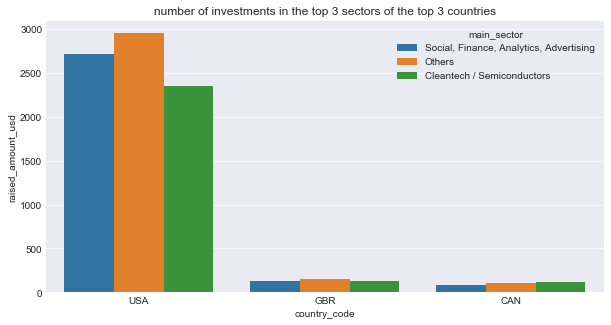

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=D123,estimator=lambda x: len(x))
plt.title('number of investments in the top 3 sectors of the top 3 countries')
plt.show()